 **Este problema es idéntido al problema 12 de la hoja de ejercicios, pero con "números".**
 
 > Una barra circular de acero y radio $R=10 cm$ y longitud $L=1.0 m$ con extremos fijos, está sometida a los
> pares $T_0$ y $2T_0$ que actúan en las posiciones mostradas en la figura. El valor de $T_0=1000.0 ~ N.m$

- (a) Obtenga una fórmula para el máximo ángulo de torsión $\phi$ de la barra.
- (b) Compruebe gráficamente que el valor obtenido se corresponde con el valor analítico esperado.
 
*Dato: modulo de rigidez del acero $G=85.0~GPa$*

Máximo ángulo de torsión (radianes) =  -0.4493786628477045


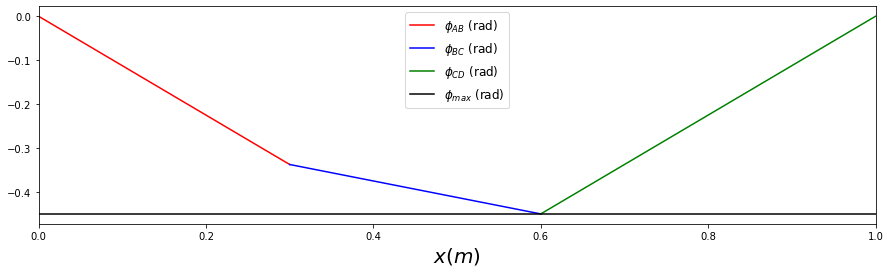

In [2]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

# Utilizando los siguientes datos, podemos pintar el resultado de la deformación angular
To = 1000.0   # en N.m
L = 1.0       # en metros
G = 85.0e9    # modulo de rigidez del acero en Pa
R= 0.01       # en metros
Ip =math.pi*R**4/2.0  # momento de inercia
x1= 3.0*L/10.0        # posición torsión To
x2= x1+3.0*L/10.0     # posición torsión 2*To

# Resolviendo analíticamente el problema hiperestático
# Ta+Td = 3*To (1-Ecuación estática)
# phi_ab_max+phi_bc_max+phi_cd_max = 0 (2-Ecuación de compatibilidad)
# Se obtiene:
Ta= 3.0*To/2.0
Td= Ta

# Con el método de las secciones llegamos a las siguientes soluciones para los ángulos máximos en cada tramo
phi_ab_max = -x1*Ta/(G*Ip)
phi_bc_max =  x1*(To-Ta)/(G*Ip)
phi_cd_max =  (L-x2)*(3.0*To-Ta)/(G*Ip)

# El ángulo máximo es:
phi_max= -3.0*L*To/(5.0*G*Ip)
print("Máximo ángulo de torsión (radianes) = ",phi_max)

#-------------------------------------------------------------------------------------#
x=symbols('x')  # x = distancia al origen               

# Ángulo en función de la distancia al origen en los distintos tramos
def phi_ab(x):        
    return  phi_ab_max*x/x1

def phi_bc(x):        
    return  phi_ab_max+phi_bc_max*(x-x1)/x1

def phi_cd(x):        
    return  phi_ab_max + phi_bc_max + phi_cd_max*(x-x2)/(L-x2)
#-------------------------------------------------------------------------------------#

# Representación gráfica
Xmin= 0.0 ; Xmax=L; nopto=50 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)

xab=np.linspace(0.0,x1,nopto)
xbc=np.linspace(x1,x2,nopto)
xcd=np.linspace(x2,L,nopto)
xx=np.linspace(0.0,L,nopto)

fab=np.zeros((nopto,1))
fbc=np.zeros((nopto,1))
fcd=np.zeros((nopto,1))
fmax=np.zeros((nopto,1))

for i in range(0,nopto):              
    fab[i]=phi_ab(x).subs(x,xab[i]) 
    fbc[i]=phi_bc(x).subs(x,xbc[i]) 
    fcd[i]=phi_cd(x).subs(x,xcd[i]) 
    fmax[i]=phi_max                             
      
fig, ax = plt.subplots(figsize=(15,4))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xab,fab, color="red", label="$\phi_{AB}$ (rad)")
ax.plot(xbc,fbc, color="blue", label="$\phi_{BC}$ (rad)") 
ax.plot(xcd,fcd, color="green", label="$\phi_{CD}$ (rad)")
ax.plot(xx,fmax, color="black", label="$\phi_{max}$ (rad)")
ax.set_xlabel("$x (m)$",fontsize=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,L)
ax.legend(fontsize=12) # Hace que se pinte la leyenda
